## NYC Environmental Program Type Prediction

Data source: https://www.kaggle.com/datasets/new-york-state/nys-environmental-remediation-sites

### Getting Started

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
pd.set_option('display.max_columns', None)

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [2]:
data = pd.read_csv('archive/environmental-remediation-sites.csv')
data

,Program Number,Program Type,Program Facility Name,Site Class,Address1,Address2,Locality,County,ZIPCode,SWIS Code,DEC Region,Latitude,Longitude,Control Code,Control Type,OU,Project Name,Project Completion Date,Waste Name,Contaminants,Owner Name,Owner Address1,Owner Address2,Owner City,Owner State,Owner ZIP,Disposal Name,Disposal Address1,Disposal Address2,Disposal City,Disposal ZIP,Disposal State,Operator Name,Operator Address1,Operator Address2,Operator City,Operator State,Operator Zip,Georeference,NYS Municipal Boundaries 2,New York Zip Codes 2,Counties 2
0,C828192,BCP,1777 East Henrietta Road,C,1777 East Henrietta Road,NaN,Henrietta,Monroe,14623,2832,8,43.084683,-77.610928,Environmental Easement,Environmental Easement,01,Remedial Investigation,2020-12-29T00:00:00.000,NaN,benzo(a)pyrene,"Kerry Ventures Tech Park, LLC","195 Middle road, suite 400",NaN,henrietta,NY,14467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'type': 'Point', 'coordinates': [-77.61092777...",546,1682.0,2093.0
1,C915272,BCP,3 Gates Circle Site,C,3 Gates Circle,NaN,Buffalo,Erie,14209,1502,9,42.919800,-78.866700,Environmental Easement,Environmental Easement,01,Remedial Action,2015-12-10T00:00:00.000,NaN,benzo(a)pyrene,Christian Campos,2760 Kenmore Avenue,NaN,tonawanda,NY,14150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'type': 'Point', 'coordinates': [-78.8667, 42...",300,65.0,2041.0
2,734052,HW,Accurate Die Casting Corporation,04,547 East Genesee Street,NaN,Fayetteville,Onondaga,13066,3438,7,43.031170,-75.999639,Deed Restriction,Deed Restriction,01B,Remedial Action,1994-12-01T00:00:00.000,NaN,"1,1,1-Trichloroethane(TCA)",Tomer Slutzky,110 Stage Road,NaN,Monroe,NY,10950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'type': 'Point', 'coordinates': [-75.99963876...",696,621.0,2132.0
3,932001B,HW,Airco Properties Inc.,04,4201 Witmer Road,NaN,Niagara,Niagara,14305,3230,9,43.124236,-79.025550,Environmental Easement,Environmental Easement,02,Remedial Investigation,2006-03-31T00:00:00.000,NaN,chromium,Mr JAmes Joe Brister,200 Somerset Corporate Blvd,Suite 7000,Bridgewater,NJ,08807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'type': 'Point', 'coordinates': [-79.02555, 4...",160,169.0,2131.0
4,907022,HW,Al Tech Specialty Steel Corporation,02,Willowbrook Avenue,NaN,Dunkirk,Chautauqua,14048,734,9,42.471672,-79.341394,Environmental Easement,Environmental Easement,02,NaN,2022-05-01T00:00:00.000,NaN,chromium,Ms. Pauline Forman,"Law Department, Box 241",3 Commercial Place,Roanoke,VA,23510,NaN,NaN,NaN,NaN,NaN,NaN,Dennis Wist,830 Brigham Road,NaN,Dunkirk,NY,14048,"{'type': 'Point', 'coordinates': [-79.34139444...",217,508.0,2035.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40211,C915198G,BCP,Site II-7 Tecumseh Phase II Business Park,A,2303 Hamburg Turnpike,NaN,Lackawanna,Erie,14218,1509,9,42.813667,-78.849003,Environmental Easement,Environmental Easement,01,Remedial Investigation,2017-01-03T00:00:00.000,NaN,benzo(a)pyrene,Keith A. Nagel,4020 Kinross Lakes Parkway,NaN,Richfield,OH,44286,NaN,NaN,NaN,NaN,NaN,NaN,"Paul H. Werthman, PE","2558 Hamburg Turnpike, Suite 300",NaN,Buffalo,NY,14218,"{'type': 'Point', 'coordinates': [-78.84900300...",287,107.0,2041.0
40212,622015,HW,Tennessee Gas Pipeline Station No. 245,C,Intersection of Traux & Burrow Rds (County Rt ...,NaN,West Winfield,Herkimer,13491,2256,6,42.875669,-75.168404,Deed Restriction,Deed Restriction,01,Remedial Action,1996-08-01T00:00:00.000,PCBS,PCB aroclor 1254,Scott J. Lewis,1211 greenville mercer road,NaN,Mercer,PA,16137,NaN,NaN,NaN,NaN,NaN,NaN,Will Hamelinck,457 burrow rd,NaN,west winfield,NY,13491,"{'type': 'Point', 'coordinates': [-75.16840428...",665,1394.0,2088.0
40213,622011,HW,Union Fork & Hoe,02,253 East Main Street,NaN,Frankfort,Herkimer,13340,2226,6,43.036669,-75.066499,Environmental Easement,Environmental Easement,01,Remedial Design,2019-04-29T00:00:00.000,N

### Preprocessing

In [3]:
df = data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40216 entries, 0 to 40215
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Program Number              40216 non-null  object 
 1   Program Type                40216 non-null  object 
 2   Program Facility Name       40216 non-null  object 
 3   Site Class                  40216 non-null  object 
 4   Address1                    40216 non-null  object 
 5   Address2                    974 non-null    object 
 6   Locality                    40216 non-null  object 
 7   County                      40216 non-null  object 
 8   ZIPCode                     40216 non-null  object 
 9   SWIS Code                   40216 non-null  int64  
 10  DEC Region                  40216 non-null  int64  
 11  Latitude                    40216 non-null  float64
 12  Longitude                   40216 non-null  float64
 13  Control Code                402

In [5]:
df.isna().sum()

Program Number                    0
Program Type                      0
Program Facility Name             0
Site Class                        0
Address1                          0
Address2                      39242
Locality                          0
County                            0
ZIPCode                           0
SWIS Code                         0
DEC Region                        0
Latitude                          0
Longitude                         0
Control Code                      0
Control Type                      0
OU                                0
Project Name                   3137
Project Completion Date          10
Waste Name                    30752
Contaminants                   5290
Owner Name                     2057
Owner Address1                 2145
Owner Address2                32105
Owner City                     2093
Owner State                    2057
Owner ZIP                      2134
Disposal Name                 20993
Disposal Address1           

In [6]:
null_columns = df.loc[:, df.isna().sum() > 0.25 * df.shape[0]].columns
null_columns

Index(['Address2', 'Waste Name', 'Owner Address2', 'Disposal Name',
       'Disposal Address1', 'Disposal Address2', 'Disposal City',
       'Disposal ZIP', 'Disposal State', 'Operator Name', 'Operator Address1',
       'Operator Address2', 'Operator City', 'Operator State', 'Operator Zip'],
      dtype='object')

In [7]:
df = df.drop(null_columns, axis=1)

In [8]:
df.isna().sum()

Program Number                   0
Program Type                     0
Program Facility Name            0
Site Class                       0
Address1                         0
Locality                         0
County                           0
ZIPCode                          0
SWIS Code                        0
DEC Region                       0
Latitude                         0
Longitude                        0
Control Code                     0
Control Type                     0
OU                               0
Project Name                  3137
Project Completion Date         10
Contaminants                  5290
Owner Name                    2057
Owner Address1                2145
Owner City                    2093
Owner State                   2057
Owner ZIP                     2134
Georeference                     0
NYS Municipal Boundaries 2       0
New York Zip Codes 2           376
Counties 2                      73
dtype: int64

In [9]:
df

,Program Number,Program Type,Program Facility Name,Site Class,Address1,Locality,County,ZIPCode,SWIS Code,DEC Region,Latitude,Longitude,Control Code,Control Type,OU,Project Name,Project Completion Date,Contaminants,Owner Name,Owner Address1,Owner City,Owner State,Owner ZIP,Georeference,NYS Municipal Boundaries 2,New York Zip Codes 2,Counties 2
0,C828192,BCP,1777 East Henrietta Road,C,1777 East Henrietta Road,Henrietta,Monroe,14623,2832,8,43.084683,-77.610928,Environmental Easement,Environmental Easement,01,Remedial Investigation,2020-12-29T00:00:00.000,benzo(a)pyrene,"Kerry Ventures Tech Park, LLC","195 Middle road, suite 400",henrietta,NY,14467,"{'type': 'Point', 'coordinates': [-77.61092777...",546,1682.0,2093.0
1,C915272,BCP,3 Gates Circle Site,C,3 Gates Circle,Buffalo,Erie,14209,1502,9,42.919800,-78.866700,Environmental Easement,Environmental Easement,01,Remedial Action,2015-12-10T00:00:00.000,benzo(a)pyrene,Christian Campos,2760 Kenmore Avenue,tonawanda,NY,14150,"{'type': 'Point', 'coordinates': [-78.8667, 42...",300,65.0,2041.0
2,734052,HW,Accurate Die Casting Corporation,04,547 East Genesee Street,Fayetteville,Onondaga,13066,3438,7,43.031170,-75.999639,Deed Restriction,Deed Restriction,01B,Remedial Action,1994-12-01T00:00:00.000,"1,1,1-Trichloroethane(TCA)",Tomer Slutzky,110 Stage Road,Monroe,NY,10950,"{'type': 'Point', 'coordinates': [-75.99963876...",696,621.0,2132.0
3,932001B,HW,Airco Properties Inc.,04,4201 Witmer Road,Niagara,Niagara,14305,3230,9,43.124236,-79.025550,Environmental Easement,Environmental Easement,02,Remedial Investigation,2006-03-31T00:00:00.000,chromium,Mr JAmes Joe Brister,200 Somerset Corporate Blvd,Bridgewater,NJ,08807,"{'type': 'Point', 'coordinates': [-79.02555, 4...",160,169.0,2131.0
4,907022,HW,Al Tech Specialty Steel Corporation,02,Willowbrook Avenue,Dunkirk,Chautauqua,14048,734,9,42.471672,-79.341394,Environmental Easement,Environmental Easement,02,NaN,2022-05-01T00:00:00.000,chromium,Ms. Pauline Forman,"Law Department, Box 241",Roanoke,VA,23510,"{'type': 'Point', 'coordinates': [-79.34139444...",217,508.0,2035.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40211,C915198G,BCP,Site II-7 Tecumseh Phase II Business Park,A,2303 Hamburg Turnpike,Lackawanna,Erie,14218,1509,9,42.813667,-78.849003,Environmental Easement,Environmental Easement,01,Remedial Investigation,2017-01-03T00:00:00.000,benzo(a)pyrene,Keith A. Nagel,4020 Kinross Lakes Parkway,Richfield,OH,44286,"{'type': 'Point', 'coordinates': [-78.84900300...",287,107.0,2041.0
40212,622015,HW,Tennessee Gas Pipeline Station No. 245,C,Intersection of Traux & Burrow Rds (County Rt ...,West Winfield,Herkimer,13491,2256,6,42.875669,-75.168404,Deed Restriction,Deed Restriction,01,Remedial Action,1996-08-01T00:00:00.000,PCB aroclor 1254,Scott J. Lewis,1211 greenville mercer road,Mercer,PA,16137,"{'type': 'Point', 'coordinates': [-75.16840428...",665,1394.0,2088.0
40213,622011,HW,Union Fork & Hoe,02,253 East Main Street,Frankfort,Herkimer,13340,2226,6,43.036669,-75.066499,Environmental Easement,Environmental Easement,01,Remedial Design,2019-04-29T00:00:00.000,benzo(b)fluoranthene,Scott Ressler,465 Railroad Avenue,Camp Hill,PA,17011,"{'type': 'Point', 'coordinates': [-75.06649901...",681,552.0,2088.0
40214,850006,HW,Seneca Army Depot,02,Route 96A,Romulus,Seneca,14541,5030,8,42.714718,-76.881875,Environmental Easement,Environmental Easement,18,Remedial Investigation,2006-09-05T00:00:00.000,arsenic,SenecaCounty Sewer District No. 2,1 Dipronio Drive,Waterloo,NY,13165,"{'type': 'Point', 'coordinates': [-76.881875, ...",578,363.0,2144.0


In [10]:
unneeded_columns = ['Program Number', 'Project Name', 'Program Facility Name', 'Address1', 'Locality', 'ZIPCode', 'SWIS Code', 'Owner Name', 'Owner Address1', 
                   'Owner City', 'Owner State', 'Owner ZIP', 'Georeference']

df = df.drop(unneeded_columns, axis=1)

In [11]:
df

,Program Type,Site Class,County,DEC Region,Latitude,Longitude,Control Code,Control Type,OU,Project Completion Date,Contaminants,NYS Municipal Boundaries 2,New York Zip Codes 2,Counties 2
0,BCP,C,Monroe,8,43.084683,-77.610928,Environmental Easement,Environmental Easement,01,2020-12-29T00:00:00.000,benzo(a)pyrene,546,1682.0,2093.0
1,BCP,C,Erie,9,42.919800,-78.866700,Environmental Easement,Environmental Easement,01,2015-12-10T00:00:00.000,benzo(a)pyrene,300,65.0,2041.0
2,HW,04,Onondaga,7,43.031170,-75.999639,Deed Restriction,Deed Restriction,01B,1994-12-01T00:00:00.000,"1,1,1-Trichloroethane(TCA)",696,621.0,2132.0
3,HW,04,Niagara,9,43.124236,-79.025550,Environmental Easement,Environmental Easement,02,2006-03-31T00:00:00.000,chromium,160,169.0,2131.0
4,HW,02,Chautauqua,9,42.471672,-79.341394,Environmental Easement,Environmental Easement,02,2022-05-01T00:00:00.000,chromium,217,508.0,2035.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40211,BCP,A,Erie,9,42.813667,-78.849003,Environmental Easement,Environmental Easement,01,2017-01-03T00:00:00.000,benzo(a)pyrene,287,107.0,2041.0
40212,HW,C,Herkimer,6,42.875669,-75.168404,Deed Restriction,Deed Restriction,01,1996-08-01T00:00:00.000,PCB aroclor 1254,665,1394.0,2088.0
40213,HW,02,Herkimer,6,43.036669,-75.066499,Environmental Easement,Environmental Easement,01,2019-04-29T00:00:00.000,benzo(b)fluoranthene,681,552.0,2088.0
40214,HW,02,Seneca,8,42.714718,-76.881875,Environmental Easement,Environmental Easement,18,2006-09-05T00:00:00.000,arsenic,578,363.0,2144.0


In [12]:
def get_uniques(df, columns):
    return {column: list(df[column].unique()) for column in columns}

def get_categorical_columns(df):
    return [column for column in df.columns if df.dtypes[column] == 'object']

In [13]:
get_uniques(df, get_categorical_columns(df))

{'Program Type': ['BCP', 'HW', 'VCP', 'ERP', 'RCRA'],
 'Site Class': ['C', '04', '02', 'A', 'N', 'P'],
 'County': ['Monroe',
  'Erie',
  'Onondaga',
  'Niagara',
  'Chautauqua',
  'Richmond',
  'Putnam',
  'Suffolk',
  'Nassau',
  'Dutchess',
  'Kings',
  'Bronx',
  'Wyoming',
  'Ulster',
  'Queens',
  'Westchester',
  'Albany',
  'Tompkins',
  'Orange',
  'Washington',
  'Oneida',
  'Fulton',
  'Rensselaer',
  'Schenectady',
  'Saratoga',
  'Seneca',
  'Wayne',
  'Broome',
  'Herkimer',
  'New York',
  'Jefferson',
  'Lewis',
  'Cattaraugus',
  'Greene',
  'Rockland',
  'Tioga',
  'Cortland',
  'Chenango',
  'Sullivan',
  'Genesee',
  'Ontario',
  'St Lawrence',
  'Yates',
  'Oswego',
  'Madison',
  'Cayuga',
  'Clinton',
  'Allegany',
  'Warren',
  'Delaware',
  'Montgomery',
  'Franklin',
  'Columbia',
  'Chemung',
  'Orleans',
  'Schuyler',
  'Livingston',
  'Steuben',
  'Otsego',
  'Schoharie',
  'Essex'],
 'Control Code': ['Environmental Easement',
  'Deed Restriction',
  'Enviro

In [14]:
# Extracting Month and Year Features from Project Completion Date Column
df['Project Completion Date'] = df['Project Completion Date'].apply(lambda x: x[0:7] if str(x) != 'nan' else x)
df['Year'] = df['Project Completion Date'].apply(lambda x: float(x[0:4]) if str(x) != 'nan' else x)
df['Month'] = df['Project Completion Date'].apply(lambda x: float(x[5:7]) if str(x) != 'nan' else x)

In [15]:
df = df.drop('Project Completion Date', axis=1)

In [16]:
df

,Program Type,Site Class,County,DEC Region,Latitude,Longitude,Control Code,Control Type,OU,Contaminants,NYS Municipal Boundaries 2,New York Zip Codes 2,Counties 2,Year,Month
0,BCP,C,Monroe,8,43.084683,-77.610928,Environmental Easement,Environmental Easement,01,benzo(a)pyrene,546,1682.0,2093.0,2020.0,12.0
1,BCP,C,Erie,9,42.919800,-78.866700,Environmental Easement,Environmental Easement,01,benzo(a)pyrene,300,65.0,2041.0,2015.0,12.0
2,HW,04,Onondaga,7,43.031170,-75.999639,Deed Restriction,Deed Restriction,01B,"1,1,1-Trichloroethane(TCA)",696,621.0,2132.0,1994.0,12.0
3,HW,04,Niagara,9,43.124236,-79.025550,Environmental Easement,Environmental Easement,02,chromium,160,169.0,2131.0,2006.0,3.0
4,HW,02,Chautauqua,9,42.471672,-79.341394,Environmental Easement,Environmental Easement,02,chromium,217,508.0,2035.0,2022.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40211,BCP,A,Erie,9,42.813667,-78.849003,Environmental Easement,Environmental Easement,01,benzo(a)pyrene,287,107.0,2041.0,2017.0,1.0
40212,HW,C,Herkimer,6,42.875669,-75.168404,Deed Restriction,Deed Restriction,01,PCB aroclor 1254,665,1394.0,2088.0,1996.0,8.0
40213,HW,02,Herkimer,6,43.036669,-75.066499,Environmental Easement,Environmental Easement,01,benzo(b)fluoranthene,681,552.0,2088.0,2019.0,4.0
40214,HW,02,Seneca,8,42.714718,-76.881875,Environmental Easement,Environmental Easement,18,arsenic,578,363.0,2144.0,2006.0,9.0


In [17]:
df.isna().sum()

Program Type                     0
Site Class                       0
County                           0
DEC Region                       0
Latitude                         0
Longitude                        0
Control Code                     0
Control Type                     0
OU                               0
Contaminants                  5290
NYS Municipal Boundaries 2       0
New York Zip Codes 2           376
Counties 2                      73
Year                            10
Month                           10
dtype: int64

In [18]:
for column in ['New York Zip Codes 2', 'Counties 2', 'Year', 'Month']:
    df[column] = df[column].fillna(df[column].mean())

In [19]:
df.isna().sum()

Program Type                     0
Site Class                       0
County                           0
DEC Region                       0
Latitude                         0
Longitude                        0
Control Code                     0
Control Type                     0
OU                               0
Contaminants                  5290
NYS Municipal Boundaries 2       0
New York Zip Codes 2             0
Counties 2                       0
Year                             0
Month                            0
dtype: int64

In [22]:
df['Contaminants'] = df['Contaminants'].fillna(df['Contaminants'].mode()[0])

In [23]:
df.isna().sum()

Program Type                  0
Site Class                    0
County                        0
DEC Region                    0
Latitude                      0
Longitude                     0
Control Code                  0
Control Type                  0
OU                            0
Contaminants                  0
NYS Municipal Boundaries 2    0
New York Zip Codes 2          0
Counties 2                    0
Year                          0
Month                         0
dtype: int64

In [24]:
df

,Program Type,Site Class,County,DEC Region,Latitude,Longitude,Control Code,Control Type,OU,Contaminants,NYS Municipal Boundaries 2,New York Zip Codes 2,Counties 2,Year,Month
0,BCP,C,Monroe,8,43.084683,-77.610928,Environmental Easement,Environmental Easement,01,benzo(a)pyrene,546,1682.000000,2093.0,2020.0,12.0
1,BCP,C,Erie,9,42.919800,-78.866700,Environmental Easement,Environmental Easement,01,benzo(a)pyrene,300,65.000000,2041.0,2015.0,12.0
2,HW,04,Onondaga,7,43.031170,-75.999639,Deed Restriction,Deed Restriction,01B,"1,1,1-Trichloroethane(TCA)",696,621.000000,2132.0,1994.0,12.0
3,HW,04,Niagara,9,43.124236,-79.025550,Environmental Easement,Environmental Easement,02,chromium,160,169.000000,2131.0,2006.0,3.0
4,HW,02,Chautauqua,9,42.471672,-79.341394,Environmental Easement,Environmental Easement,02,chromium,217,508.000000,2035.0,2022.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40211,BCP,A,Erie,9,42.813667,-78.849003,Environmental Easement,Environmental Easement,01,benzo(a)pyrene,287,107.000000,2041.0,2017.0,1.0
40212,HW,C,Herkimer,6,42.875669,-75.168404,Deed Restriction,Deed Restriction,01,PCB aroclor 1254,665,1394.000000,2088.0,1996.0,8.0
40213,HW,02,Herkimer,6,43.036669,-75.066499,Environmental Easement,Environmental Easement,01,benzo(b)fluoranthene,681,552.000000,2088.0,2019.0,4.0
40214,HW,02,Seneca,8,42.714718,-76.881875,Environmental Easement,Environmental Easement,18,arsenic,578,363.000000,2144.0,2006.0,9.0


#### Encoding

In [25]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix, dtype=int)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [26]:
get_categorical_columns(df)

['Program Type',
 'Site Class',
 'County',
 'Control Code',
 'Control Type',
 'OU',
 'Contaminants']

In [27]:
nominal_features = get_categorical_columns(df)
nominal_features.remove('Program Type')

In [28]:
nominal_features

['Site Class', 'County', 'Control Code', 'Control Type', 'OU', 'Contaminants']

In [29]:
column_prefixes = ['SC', 'C', 'CC', 'CT', 'OU', 'CM']

In [30]:
df = onehot_encode(df, nominal_features, column_prefixes)
df

,Program Type,DEC Region,Latitude,Longitude,NYS Municipal Boundaries 2,New York Zip Codes 2,Counties 2,Year,Month,SC_02,SC_04,SC_A,SC_C,SC_N,SC_P,C_Albany,C_Allegany,C_Bronx,C_Broome,C_Cattaraugus,C_Cayuga,C_Chautauqua,C_Chemung,C_Chenango,C_Clinton,C_Columbia,C_Cortland,C_Delaware,C_Dutchess,C_Erie,C_Essex,C_Franklin,C_Fulton,C_Genesee,C_Greene,C_Herkimer,C_Jefferson,C_Kings,C_Lewis,C_Livingston,C_Madison,C_Monroe,C_Montgomery,C_Nassau,C_New York,C_Niagara,C_Oneida,C_Onondaga,C_Ontario,C_Orange,C_Orleans,C_Oswego,C_Otsego,C_Putnam,C_Queens,C_Rensselaer,C_Richmond,C_Rockland,C_Saratoga,C_Schenectady,C_Schoharie,C_Schuyler,C_Seneca,C_St Lawrence,C_Steuben,C_Suffolk,C_Sullivan,C_Tioga,C_Tompkins,C_Ulster,C_Warren,C_Washington,C_Wayne,C_Westchester,C_Wyoming,C_Yates,CC_Decision Document,CC_Deed Restriction,CC_Environmental Easement,CC_Environmental Notice,CC_Other Controls,CT_Decision Document,CT_Deed Restriction,CT_Environmental Easement,CT_Environmental Notice,CT_Other Controls,OU_00,OU_01,OU_01A,OU_01B,OU_01C,OU_01D,OU_02,OU_02A,OU_02B,OU_03,OU_03A,OU_04,OU_04A,OU_05,OU_05A,OU_06,OU_06A,OU_07,OU_08,OU_09,OU_11,OU_12,OU_13,OU_14,OU_15,OU_16,OU_17,OU_18,OU_19,OU_20,OU_21,OU_25,OU_42,"CM_1,1 dichloroethene","CM_1,1,1,2-tetrachloroethane","CM_1,1,1-Trichloroethane(TCA)","CM_1,1,1-trichloroethane","CM_1,1,2,2-TCA","CM_1,1,2,2-tetrachloroethane","CM_1,1,2-TCA","CM_1,1,2-trichlorethylene","CM_1,1,2-trichloro-1,2,2-triflouroethane","CM_1,1,2-trichloroethane","CM_1,1-dichloroethane","CM_1,2,4,5-tetrachlorobenzene","CM_1,2,4-TMB","CM_1,2,4-trichlorobenzene","CM_1,2,4-trimethylbenzene","CM_1,2-benzphenanthrene","CM_1,2-dichlorobenzene","CM_1,2-dichloroethane","CM_1,2-dichloroethene","CM_1,3,5-trimethylbenzene","CM_1,3,5-trioxane, 2,4,6-trimethyl-","CM_1,3-dichlorobenzene","CM_1,4-dichlorobenzene","CM_1,4-dioxane","CM_2,2,4-trimethylpentane","CM_2,3,7,8-tetrachlorodibenzo-p-dioxin (TCDD)","CM_2,4,5-tp acid","CM_2,4,5-trichlorophenol",CM_2-ethylanthraquinone,"CM_4,7-methano-1h-indene, 1,4,5,6,7,8,8-heptachloro- 3a,3,7,7a-tetrahydro-",CM_DDD,CM_DDE,CM_DDT,CM_MEK,CM_MTBE (methyl-tert-butyl ether),CM_PCB aroclor 1262,CM_PCB aroclor 1016,CM_PCB aroclor 1242,CM_PCB aroclor 1248,CM_PCB aroclor 1254,CM_PCB aroclor 1260,CM_PCB oil,CM_PCE,CM_PVC,CM_Perfluorooctane Sulfonic Acid,CM_acenaphthene,CM_acenapthylene,CM_acetone,CM_aldrin,CM_alpha-BHC,CM_ammonia,CM_aniline,CM_anthracene,CM_antimony,CM_arsenic,CM_arsenic pentoxide,CM_asbestos,CM_ash,CM_barium,CM_benzene,CM_benzene chloro-,"CM_benzene, toluene, ethylbenzene and xylenes (BTEX)",CM_benzo(a)anthracene,CM_benzo(a)pyrene,CM_benzo(b)fluoranthene,"CM_benzo(g,h,i)perylene",CM_benzo(k)fluoranthene,CM_benzoic acid,CM_beryllium,CM_beta-BHC,CM_bis(2-ethylhexyl)phthalate,CM_brine,CM_bromobenzene,CM_butyl benzyl phthalate,CM_butylbenzene,CM_cadmium,CM_calcium,CM_calcium carbonate,CM_carbon tetrachloride,CM_chlordane,CM_chlorinated solvents,CM_chlorobenzene,CM_chloroethane,CM_chloroethylene,CM_chloroform,CM_chlorotoluene,CM_chromic acid,CM_chromium,CM_chrysene,"CM_cis-1,2-dichloroethene",CM_coal tar,CM_coal tar pitch volatiles,CM_cobalt,CM_copper,CM_cumene,CM_cyanides(soluble cyanide salts),CM_cyclohexane,CM_degreaser,CM_delta-BHC,"CM_dibenz[a,h]anthracene",CM_dibenzofuran,CM_dibutyl phthalate,CM_dichlorobenzene (mixed),CM_dichlorodifluoromethane,"CM_dichloroethene (1,1-)","CM_dichloroethene (cis-1,2-)","CM_dichloroethene (trans-1,2-)",CM_dichloromethane,CM_dieldrin,CM_diethyl phthalate,CM_dimethyl phthalate,CM_dimethylhydrazine,CM_dinitrotoluene,CM_dioxin,CM_endosulfan,CM_endosulfan sulfate,CM_endrin,CM_ethanol,CM_ethyl acetate,CM_ethyl ether,CM_ethylbenzene,CM_ethylene dichloride,CM_ethylene glycol,CM_ethylidene dichloride,CM_fluoranthene,CM_fluorene,CM_formaldehyde,CM_foundry sand,CM_freon,CM_gasoline constituent,CM_grinding oil,CM_heavy metals,CM_heptachlor epoxide,CM_heptane,CM_herbicides,CM_hexachlorobenzene,CM_hexachlorobutadiene,CM_hexachlorocyclohexane (all isomers),CM_hexachlorocyclopentadiene,CM

In [32]:
label_encoder = LabelEncoder()

df['Program Type'] = label_encoder.fit_transform(df['Program Type'])

In [33]:
label_encoder.classes_

array(['BCP', 'ERP', 'HW', 'RCRA', 'VCP'], dtype=object)

In [34]:
target_mapping = {index: column for index, column in enumerate(label_encoder.classes_)}

In [35]:
target_mapping

{0: 'BCP', 1: 'ERP', 2: 'HW', 3: 'RCRA', 4: 'VCP'}

In [36]:
df

,Program Type,DEC Region,Latitude,Longitude,NYS Municipal Boundaries 2,New York Zip Codes 2,Counties 2,Year,Month,SC_02,SC_04,SC_A,SC_C,SC_N,SC_P,C_Albany,C_Allegany,C_Bronx,C_Broome,C_Cattaraugus,C_Cayuga,C_Chautauqua,C_Chemung,C_Chenango,C_Clinton,C_Columbia,C_Cortland,C_Delaware,C_Dutchess,C_Erie,C_Essex,C_Franklin,C_Fulton,C_Genesee,C_Greene,C_Herkimer,C_Jefferson,C_Kings,C_Lewis,C_Livingston,C_Madison,C_Monroe,C_Montgomery,C_Nassau,C_New York,C_Niagara,C_Oneida,C_Onondaga,C_Ontario,C_Orange,C_Orleans,C_Oswego,C_Otsego,C_Putnam,C_Queens,C_Rensselaer,C_Richmond,C_Rockland,C_Saratoga,C_Schenectady,C_Schoharie,C_Schuyler,C_Seneca,C_St Lawrence,C_Steuben,C_Suffolk,C_Sullivan,C_Tioga,C_Tompkins,C_Ulster,C_Warren,C_Washington,C_Wayne,C_Westchester,C_Wyoming,C_Yates,CC_Decision Document,CC_Deed Restriction,CC_Environmental Easement,CC_Environmental Notice,CC_Other Controls,CT_Decision Document,CT_Deed Restriction,CT_Environmental Easement,CT_Environmental Notice,CT_Other Controls,OU_00,OU_01,OU_01A,OU_01B,OU_01C,OU_01D,OU_02,OU_02A,OU_02B,OU_03,OU_03A,OU_04,OU_04A,OU_05,OU_05A,OU_06,OU_06A,OU_07,OU_08,OU_09,OU_11,OU_12,OU_13,OU_14,OU_15,OU_16,OU_17,OU_18,OU_19,OU_20,OU_21,OU_25,OU_42,"CM_1,1 dichloroethene","CM_1,1,1,2-tetrachloroethane","CM_1,1,1-Trichloroethane(TCA)","CM_1,1,1-trichloroethane","CM_1,1,2,2-TCA","CM_1,1,2,2-tetrachloroethane","CM_1,1,2-TCA","CM_1,1,2-trichlorethylene","CM_1,1,2-trichloro-1,2,2-triflouroethane","CM_1,1,2-trichloroethane","CM_1,1-dichloroethane","CM_1,2,4,5-tetrachlorobenzene","CM_1,2,4-TMB","CM_1,2,4-trichlorobenzene","CM_1,2,4-trimethylbenzene","CM_1,2-benzphenanthrene","CM_1,2-dichlorobenzene","CM_1,2-dichloroethane","CM_1,2-dichloroethene","CM_1,3,5-trimethylbenzene","CM_1,3,5-trioxane, 2,4,6-trimethyl-","CM_1,3-dichlorobenzene","CM_1,4-dichlorobenzene","CM_1,4-dioxane","CM_2,2,4-trimethylpentane","CM_2,3,7,8-tetrachlorodibenzo-p-dioxin (TCDD)","CM_2,4,5-tp acid","CM_2,4,5-trichlorophenol",CM_2-ethylanthraquinone,"CM_4,7-methano-1h-indene, 1,4,5,6,7,8,8-heptachloro- 3a,3,7,7a-tetrahydro-",CM_DDD,CM_DDE,CM_DDT,CM_MEK,CM_MTBE (methyl-tert-butyl ether),CM_PCB aroclor 1262,CM_PCB aroclor 1016,CM_PCB aroclor 1242,CM_PCB aroclor 1248,CM_PCB aroclor 1254,CM_PCB aroclor 1260,CM_PCB oil,CM_PCE,CM_PVC,CM_Perfluorooctane Sulfonic Acid,CM_acenaphthene,CM_acenapthylene,CM_acetone,CM_aldrin,CM_alpha-BHC,CM_ammonia,CM_aniline,CM_anthracene,CM_antimony,CM_arsenic,CM_arsenic pentoxide,CM_asbestos,CM_ash,CM_barium,CM_benzene,CM_benzene chloro-,"CM_benzene, toluene, ethylbenzene and xylenes (BTEX)",CM_benzo(a)anthracene,CM_benzo(a)pyrene,CM_benzo(b)fluoranthene,"CM_benzo(g,h,i)perylene",CM_benzo(k)fluoranthene,CM_benzoic acid,CM_beryllium,CM_beta-BHC,CM_bis(2-ethylhexyl)phthalate,CM_brine,CM_bromobenzene,CM_butyl benzyl phthalate,CM_butylbenzene,CM_cadmium,CM_calcium,CM_calcium carbonate,CM_carbon tetrachloride,CM_chlordane,CM_chlorinated solvents,CM_chlorobenzene,CM_chloroethane,CM_chloroethylene,CM_chloroform,CM_chlorotoluene,CM_chromic acid,CM_chromium,CM_chrysene,"CM_cis-1,2-dichloroethene",CM_coal tar,CM_coal tar pitch volatiles,CM_cobalt,CM_copper,CM_cumene,CM_cyanides(soluble cyanide salts),CM_cyclohexane,CM_degreaser,CM_delta-BHC,"CM_dibenz[a,h]anthracene",CM_dibenzofuran,CM_dibutyl phthalate,CM_dichlorobenzene (mixed),CM_dichlorodifluoromethane,"CM_dichloroethene (1,1-)","CM_dichloroethene (cis-1,2-)","CM_dichloroethene (trans-1,2-)",CM_dichloromethane,CM_dieldrin,CM_diethyl phthalate,CM_dimethyl phthalate,CM_dimethylhydrazine,CM_dinitrotoluene,CM_dioxin,CM_endosulfan,CM_endosulfan sulfate,CM_endrin,CM_ethanol,CM_ethyl acetate,CM_ethyl ether,CM_ethylbenzene,CM_ethylene dichloride,CM_ethylene glycol,CM_ethylidene dichloride,CM_fluoranthene,CM_fluorene,CM_formaldehyde,CM_foundry sand,CM_freon,CM_gasoline constituent,CM_grinding oil,CM_heavy metals,CM_heptachlor epoxide,CM_heptane,CM_herbicides,CM_hexachlorobenzene,CM_hexachlorobutadiene,CM_hexachlorocyclohexane (all isomers),CM_hexachlorocyclopentadiene,CM

#### Splitting and Scaling 

In [37]:
y = df['Program Type'].copy()
X = df.drop('Program Type', axis=1).copy()

In [38]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)

In [39]:
X

,DEC Region,Latitude,Longitude,NYS Municipal Boundaries 2,New York Zip Codes 2,Counties 2,Year,Month,SC_02,SC_04,SC_A,SC_C,SC_N,SC_P,C_Albany,C_Allegany,C_Bronx,C_Broome,C_Cattaraugus,C_Cayuga,C_Chautauqua,C_Chemung,C_Chenango,C_Clinton,C_Columbia,C_Cortland,C_Delaware,C_Dutchess,C_Erie,C_Essex,C_Franklin,C_Fulton,C_Genesee,C_Greene,C_Herkimer,C_Jefferson,C_Kings,C_Lewis,C_Livingston,C_Madison,C_Monroe,C_Montgomery,C_Nassau,C_New York,C_Niagara,C_Oneida,C_Onondaga,C_Ontario,C_Orange,C_Orleans,C_Oswego,C_Otsego,C_Putnam,C_Queens,C_Rensselaer,C_Richmond,C_Rockland,C_Saratoga,C_Schenectady,C_Schoharie,C_Schuyler,C_Seneca,C_St Lawrence,C_Steuben,C_Suffolk,C_Sullivan,C_Tioga,C_Tompkins,C_Ulster,C_Warren,C_Washington,C_Wayne,C_Westchester,C_Wyoming,C_Yates,CC_Decision Document,CC_Deed Restriction,CC_Environmental Easement,CC_Environmental Notice,CC_Other Controls,CT_Decision Document,CT_Deed Restriction,CT_Environmental Easement,CT_Environmental Notice,CT_Other Controls,OU_00,OU_01,OU_01A,OU_01B,OU_01C,OU_01D,OU_02,OU_02A,OU_02B,OU_03,OU_03A,OU_04,OU_04A,OU_05,OU_05A,OU_06,OU_06A,OU_07,OU_08,OU_09,OU_11,OU_12,OU_13,OU_14,OU_15,OU_16,OU_17,OU_18,OU_19,OU_20,OU_21,OU_25,OU_42,"CM_1,1 dichloroethene","CM_1,1,1,2-tetrachloroethane","CM_1,1,1-Trichloroethane(TCA)","CM_1,1,1-trichloroethane","CM_1,1,2,2-TCA","CM_1,1,2,2-tetrachloroethane","CM_1,1,2-TCA","CM_1,1,2-trichlorethylene","CM_1,1,2-trichloro-1,2,2-triflouroethane","CM_1,1,2-trichloroethane","CM_1,1-dichloroethane","CM_1,2,4,5-tetrachlorobenzene","CM_1,2,4-TMB","CM_1,2,4-trichlorobenzene","CM_1,2,4-trimethylbenzene","CM_1,2-benzphenanthrene","CM_1,2-dichlorobenzene","CM_1,2-dichloroethane","CM_1,2-dichloroethene","CM_1,3,5-trimethylbenzene","CM_1,3,5-trioxane, 2,4,6-trimethyl-","CM_1,3-dichlorobenzene","CM_1,4-dichlorobenzene","CM_1,4-dioxane","CM_2,2,4-trimethylpentane","CM_2,3,7,8-tetrachlorodibenzo-p-dioxin (TCDD)","CM_2,4,5-tp acid","CM_2,4,5-trichlorophenol",CM_2-ethylanthraquinone,"CM_4,7-methano-1h-indene, 1,4,5,6,7,8,8-heptachloro- 3a,3,7,7a-tetrahydro-",CM_DDD,CM_DDE,CM_DDT,CM_MEK,CM_MTBE (methyl-tert-butyl ether),CM_PCB aroclor 1262,CM_PCB aroclor 1016,CM_PCB aroclor 1242,CM_PCB aroclor 1248,CM_PCB aroclor 1254,CM_PCB aroclor 1260,CM_PCB oil,CM_PCE,CM_PVC,CM_Perfluorooctane Sulfonic Acid,CM_acenaphthene,CM_acenapthylene,CM_acetone,CM_aldrin,CM_alpha-BHC,CM_ammonia,CM_aniline,CM_anthracene,CM_antimony,CM_arsenic,CM_arsenic pentoxide,CM_asbestos,CM_ash,CM_barium,CM_benzene,CM_benzene chloro-,"CM_benzene, toluene, ethylbenzene and xylenes (BTEX)",CM_benzo(a)anthracene,CM_benzo(a)pyrene,CM_benzo(b)fluoranthene,"CM_benzo(g,h,i)perylene",CM_benzo(k)fluoranthene,CM_benzoic acid,CM_beryllium,CM_beta-BHC,CM_bis(2-ethylhexyl)phthalate,CM_brine,CM_bromobenzene,CM_butyl benzyl phthalate,CM_butylbenzene,CM_cadmium,CM_calcium,CM_calcium carbonate,CM_carbon tetrachloride,CM_chlordane,CM_chlorinated solvents,CM_chlorobenzene,CM_chloroethane,CM_chloroethylene,CM_chloroform,CM_chlorotoluene,CM_chromic acid,CM_chromium,CM_chrysene,"CM_cis-1,2-dichloroethene",CM_coal tar,CM_coal tar pitch volatiles,CM_cobalt,CM_copper,CM_cumene,CM_cyanides(soluble cyanide salts),CM_cyclohexane,CM_degreaser,CM_delta-BHC,"CM_dibenz[a,h]anthracene",CM_dibenzofuran,CM_dibutyl phthalate,CM_dichlorobenzene (mixed),CM_dichlorodifluoromethane,"CM_dichloroethene (1,1-)","CM_dichloroethene (cis-1,2-)","CM_dichloroethene (trans-1,2-)",CM_dichloromethane,CM_dieldrin,CM_diethyl phthalate,CM_dimethyl phthalate,CM_dimethylhydrazine,CM_dinitrotoluene,CM_dioxin,CM_endosulfan,CM_endosulfan sulfate,CM_endrin,CM_ethanol,CM_ethyl acetate,CM_ethyl ether,CM_ethylbenzene,CM_ethylene dichloride,CM_ethylene glycol,CM_ethylidene dichloride,CM_fluoranthene,CM_fluorene,CM_formaldehyde,CM_foundry sand,CM_freon,CM_gasoline constituent,CM_grinding oil,CM_heavy metals,CM_heptachlor epoxide,CM_heptane,CM_herbicides,CM_hexachlorobenzene,CM_hexachlorobutadiene,CM_hexachlorocyclohexane (all isomers),CM_hexachlorocyclopentadiene,CM_hexane,CM_hy

In [40]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

### Training

In [41]:
X.shape

(40216, 345)

In [42]:
y.value_counts()

Program Type
2    23722
0    11767
1     2613
4     2098
3       16
Name: count, dtype: int64

In [43]:
inputs = tf.keras.Input(shape=(345, ))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(5, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

batch_size = 64
epochs = 60

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()]
)

Epoch 1/60
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8969 - loss: 0.3292 - val_accuracy: 0.9453 - val_loss: 0.1525 - learning_rate: 0.0010
Epoch 2/60
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9563 - loss: 0.1287 - val_accuracy: 0.9540 - val_loss: 0.1242 - learning_rate: 0.0010
Epoch 3/60
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9639 - loss: 0.1059 - val_accuracy: 0.9595 - val_loss: 0.1109 - learning_rate: 0.0010
Epoch 4/60
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9683 - loss: 0.0940 - val_accuracy: 0.9622 - val_loss: 0.1045 - learning_rate: 0.0010
Epoch 5/60
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9688 - loss: 0.0860 - val_accuracy: 0.9648 - val_loss: 0.1011 - learning_rate: 0.0010
Epoch 6/60
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9716 - loss: 0.0791 - val_accuracy: 0.9675 - val_loss: 0.0975 - learning_rate: 0.0010
Epoch 7/60
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9733 - loss: 0.0740 - 

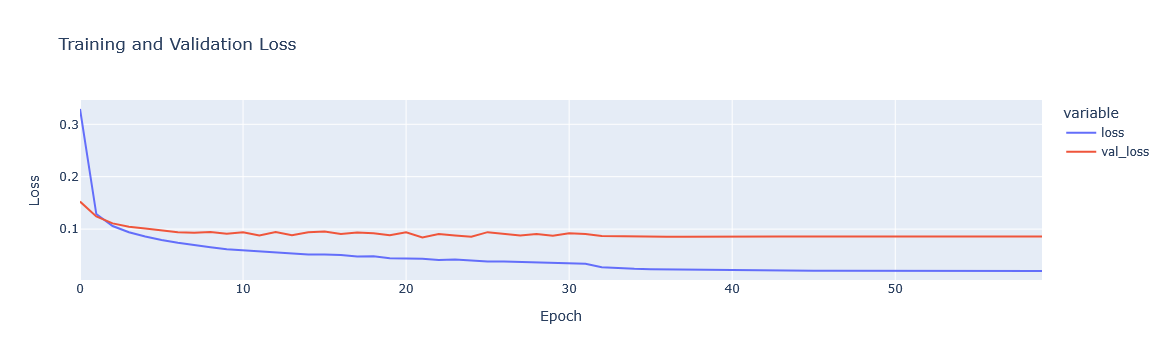

In [44]:
fig = px.line(
    history.history, 
    y = ['loss', 'val_loss'],
    labels = {'index': 'Epoch', 'value': 'Loss'},
    title = 'Training and Validation Loss'
)

fig.show()

In [45]:
model.evaluate(X_test, y_test)

378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9722 - loss: 0.1145


[0.11453426629304886, 0.9721508622169495]

In [46]:
y_test.value_counts()

Program Type
2    6985
0    3615
1     818
4     643
3       4
Name: count, dtype: int64

In [47]:
for label in range(5):
    label_indices = y_test[y_test == label].index
    label_acc = model.evaluate(X_test.loc[label_indices, :], y_test.loc[label_indices], verbose=0)
    print(f"Class {label} Accuracy: {label_acc[1]}")

Class 0 Accuracy: 0.9737206101417542
Class 1 Accuracy: 0.7958435416221619
Class 2 Accuracy: 0.9926986694335938
Class 3 Accuracy: 0.75
Class 4 Accuracy: 0.9657853841781616
